In [ ]:
#                                          ::   Serene  ::

In [ ]:
# Supervised learning method for ocean time serise data

Epoch 1/100
11/11 [==============================] - 2s 48ms/step - loss: 0.2147 - val_loss: 0.0271
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0310 - val_loss: 0.0152
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0258 - val_loss: 0.0113
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0241 - val_loss: 0.0167
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0228 - val_loss: 0.0160
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0219 - val_loss: 0.0138
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0216 - val_loss: 0.0144
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0211 - val_loss: 0.0129
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0208 - val_loss: 0.0125
Epoch 11

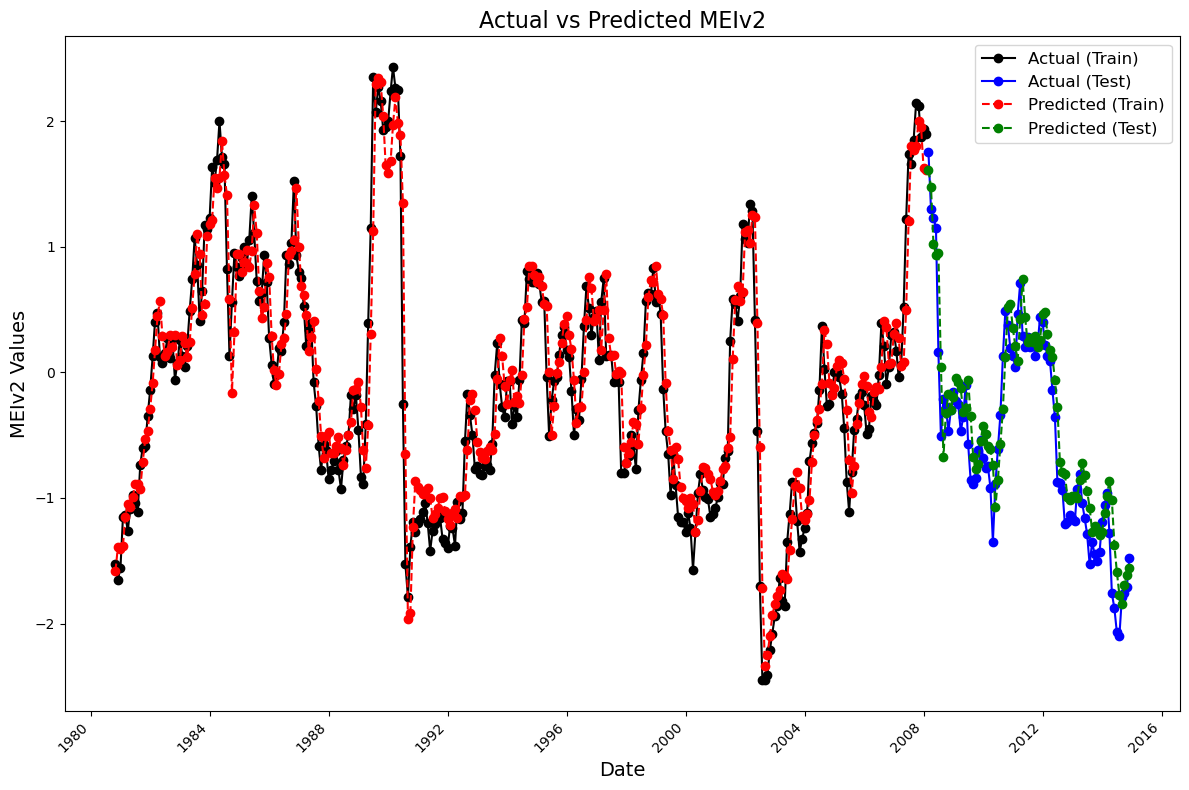

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Extract features and target
features = df[['AAO', 'AO', 'DMI', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']]
target = df['MEIv2'].values.reshape(-1, 1)




#..................................................<START VEDAS>.............................................................
#                               ::    Supervised learning for sequential data    ::
#                    :: Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM)  ::
#                                      ::  BY THE OCEAN, FOR THE OCEAN,  ::


# Normalize the target variable
scaler_target = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler_target.fit_transform(target)




# Function to create sequences for the RNN
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)




# Define the sequence length and create sequences
sequence_length = 10  # You can adjust this based on your dataset
sequences = create_sequences(target_scaled, sequence_length)




# Split the data into training and testing sets
split_ratio = 0.8
train_size = int(len(sequences) * split_ratio)
train_data, test_data = sequences[:train_size], sequences[train_size:]




# Split into input and target variables
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]




# Reshape input to be 3D (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)





# Build the RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')




# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)




# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)




# Invert the scaling to get the actual values
train_predictions_actual = scaler_target.inverse_transform(train_predictions)
y_train_actual = scaler_target.inverse_transform(y_train.reshape(-1, 1))
test_predictions_actual = scaler_target.inverse_transform(test_predictions)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

#..................................................<END VEDAS>............................................................



# Plot 
plt.figure(figsize=(12, 8))
plt.plot(df['DATE'].iloc[sequence_length:len(train_predictions_actual) + sequence_length], y_train_actual, label='Actual (Train)', marker='o', color='black')
plt.plot(df['DATE'].iloc[len(train_predictions_actual) + sequence_length:], y_test_actual, label='Actual (Test)', marker='o', color='blue')
plt.plot(df['DATE'].iloc[sequence_length:len(train_predictions_actual) + sequence_length], train_predictions_actual, label='Predicted (Train)', marker='o', linestyle='dashed', color='red')
plt.plot(df['DATE'].iloc[len(train_predictions_actual) + sequence_length:], test_predictions_actual, label='Predicted (Test)', marker='o', linestyle='dashed', color='green')
plt.xlabel('Date', fontsize=14)
plt.ylabel('MEIv2 Values', fontsize=14)
plt.title('Actual vs Predicted MEIv2', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#                                          ::  Cheers!  ::

In [ ]:
#                                       ::    Subhadeep   ::    